In [1]:
import numpy as np;
import pandas as pd;

In [2]:
import seaborn as sns;
import matplotlib.pyplot as plt;

Yo wait what??
This is my markdown baby.

In [3]:
%matplotlib inline

In [4]:
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


In [5]:
data = fetch_california_housing()
X, y = data.data, data.target
print(X.shape, y.shape)

(20640, 8) (20640,)


In [6]:
df = pd.DataFrame(X, columns=data.feature_names)
df['Sale Price'] = y
df.head(2)

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Sale Price
0,8.3252,41.0,6.984127,1.02381,322.0,2.555556,37.88,-122.23,4.526
1,8.3014,21.0,6.238137,0.97188,2401.0,2.109842,37.86,-122.22,3.585


In [7]:
print(data.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

:Number of Instances: 20640

:Number of Attributes: 8 numeric, predictive attributes and the target

:Attribute Information:
    - MedInc        median income in block group
    - HouseAge      median house age in block group
    - AveRooms      average number of rooms per household
    - AveBedrms     average number of bedrooms per household
    - Population    block group population
    - AveOccup      average number of household members
    - Latitude      block group latitude
    - Longitude     block group longitude

:Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per ce

In [8]:
print(df.shape)

(20640, 9)


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   MedInc      20640 non-null  float64
 1   HouseAge    20640 non-null  float64
 2   AveRooms    20640 non-null  float64
 3   AveBedrms   20640 non-null  float64
 4   Population  20640 non-null  float64
 5   AveOccup    20640 non-null  float64
 6   Latitude    20640 non-null  float64
 7   Longitude   20640 non-null  float64
 8   Sale Price  20640 non-null  float64
dtypes: float64(9)
memory usage: 1.4 MB


In [11]:
df.describe()

,MedInc,HouseAge,AveRooms,AveBedrms,Population,AveOccup,Latitude,Longitude,Sale Price
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,3.870671,28.639486,5.429000,1.096675,1425.476744,3.070655,35.631861,-119.569704,2.068558
std,1.899822,12.585558,2.474173,0.473911,1132.462122,10.386050,2.135952,2.003532,1.153956
min,0.499900,1.000000,0.846154,0.333333,3.000000,0.692308,32.540000,-124.350000,0.149990
25%,2.563400,18.000000,4.440716,1.006079,787.000000,2.429741,33.930000,-121.800000,1.196000
50%,3.534800,29.000000,5.229129,1.048780,1166.000000,2.818116,34.260000,-118.490000,1.797000
75%,4.743250,37.000000,6.052381,1.099526,1725.000000,3.282261,37.710000,-118.010000,2.647250
max,15.000100,52.000000,141.909091,34.066667,35682.000000,1243.333333,41.950000,-114.310000,5.000010


In [12]:
df.isnull().sum()

MedInc        0
HouseAge      0
AveRooms      0
AveBedrms     0
Population    0
AveOccup      0
Latitude      0
Longitude     0
Sale Price    0
dtype: int64

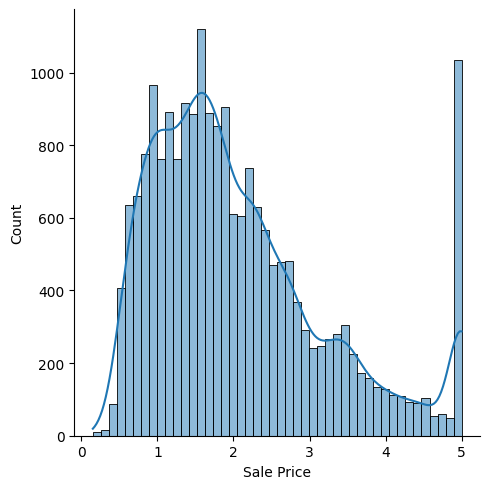

In [22]:
curr = sns.displot(df['Sale Price'], kde=True)


In [24]:
print("Skewness: ", df['Sale Price'].skew())
print("Kurtosis: ", df['Sale Price'].kurtosis())


Skewness:  0.9777632739098335
Kurtosis:  0.3278702429465876


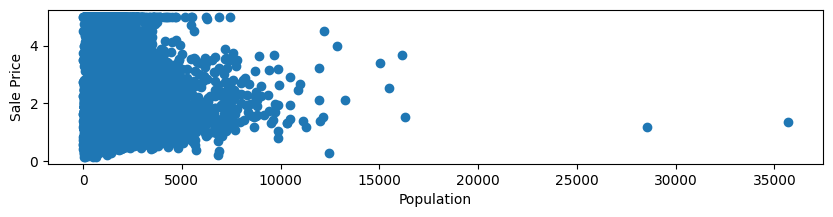

In [ ]:
fig, ax = plt.subplots(figsize=(10,2))
ax.scatter(x = df["Population"], y = df["Sale Price"])
plt.xlabel("Population")
plt.ylabel("Sale Price")
plt.show()

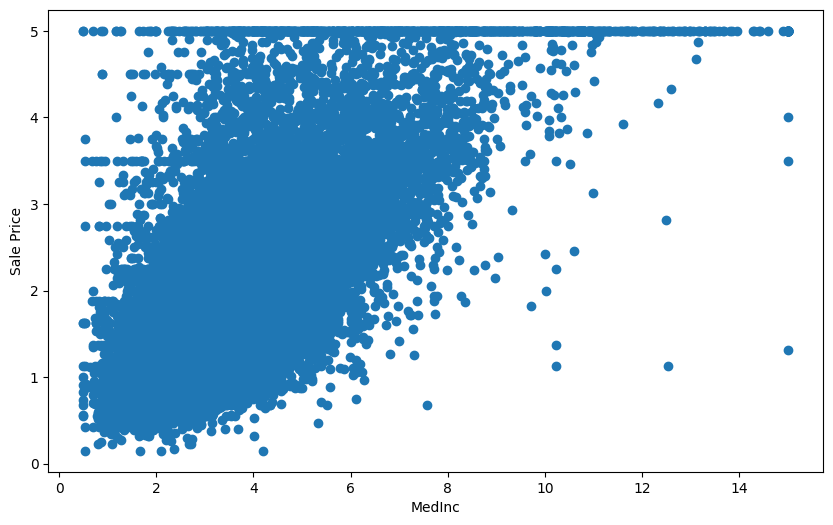

In [35]:
fig, ax = plt.subplots(figsize=(10,6))
ax.scatter(x = df["MedInc"], y = df["Sale Price"])
plt.xlabel("MedInc")
plt.ylabel("Sale Price")
plt.show()


 mu = 2.07 and sigma = 1.15



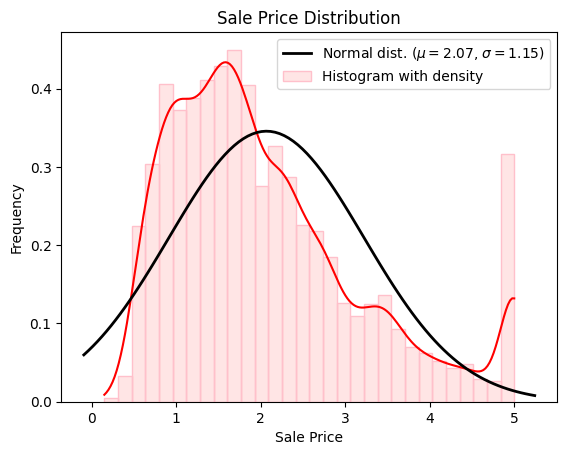

In [63]:
from scipy import stats
from scipy.stats import norm, skew

# Fit a normal distribution
(mu, sigma) = norm.fit(df['Sale Price'])

# Histogram with density
sns.histplot(df['Sale Price'], kde=True, stat="density", bins=30, color='red', edgecolor='pink', alpha=0.1, label='Histogram with density')

# Plot the fitted normal distribution curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, sigma)
plt.plot(x, p, 'k', linewidth=2, label= 'Normal dist. ($\mu={:.2f}$, $\sigma={:.2f}$)'.format(mu, sigma))

# Add legend, labels, title
plt.legend(loc='best')
plt.ylabel('Frequency')
plt.title('Sale Price Distribution')

# QQ-plot (probability plot)
# fig = plt.figure()
# res = stats.probplot(df['Sale Price'], plot=plt)
# plt.show()

# Print mu and sigma
print("\n mu = {:.2f} and sigma = {:.2f}\n".format(mu, sigma))

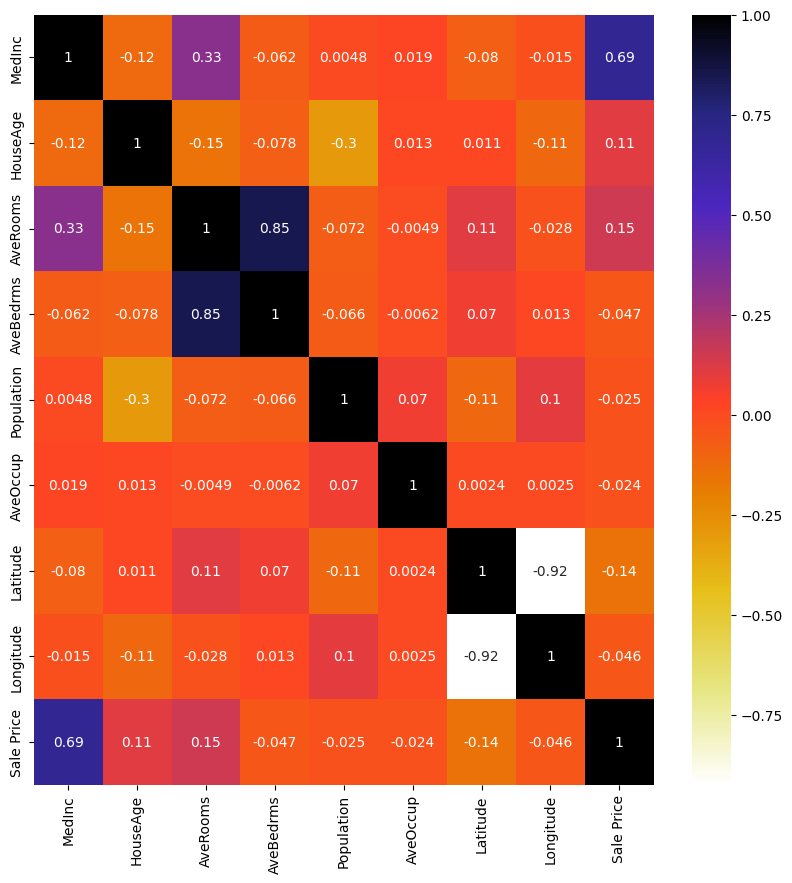

In [67]:
plt.figure(figsize=(10,10))
cor = df.corr()
sns.heatmap(cor, annot=True, cmap=plt.cm.CMRmap_r)
plt.show()

In [ ]:
cor_values = abs(cor["Sale Price"])
rel_feat = cor_values[cor_values > 0.1]

names = [index for index, value in rel_feat.items()]
names.remove('Sale Price')

print(names)

['MedInc', 'HouseAge', 'AveRooms', 'Latitude']


MODEL TRAINING

In [84]:
X = df.drop("Sale Price", axis = 1)
Y = df["Sale Price"]
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [85]:
print(X_train.shape, X_test.shape, Y_train.shape, Y_test.shape)

(16512, 8) (4128, 8) (16512,) (4128,)


In [86]:
from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(X_train, Y_train)
Y_pred = lr.predict(X_test)
print(Y_pred)


[0.71912284 1.76401657 2.70965883 ... 4.46877017 1.18751119 2.00940251]


In [89]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
print('Mean Absolute Error:', mean_absolute_error(Y_test, Y_pred))
print('Mean Squared Error:', mean_squared_error(Y_test, Y_pred))
print('Root Mean Squared Error:', np.sqrt(mean_squared_error(Y_test, Y_pred)))

Mean Absolute Error: 0.5332001304956551
Mean Squared Error: 0.5558915986952435
Root Mean Squared Error: 0.7455813830127758
